<a href="https://colab.research.google.com/github/AI-Junction/Learn-ML/blob/LearnPandas/LearnPandasPart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Provide a comprehensive set of pandas learning exercises covering data loading, inspection, selection, filtering, sorting, handling missing values, aggregation, and visualization, culminating in a small project applying these concepts.

## Introduction to pandas

### Subtask:
Start with the basics of pandas, such as creating DataFrames and Series.


**Reasoning**:
The first step is to import the pandas library and then create a Series and a DataFrame as instructed.



In [2]:
import pandas as pd

# Create a pandas Series from a Python list
s1 = pd.Series([1, 2, 3, 4, 5])

# Create a pandas DataFrame from a Python dictionary
data = {'col1': [10, 20, 30, 40], 'col2': [50, 60, 70, 80]}
df1 = pd.DataFrame(data)

# Print the created Series and DataFrame
print("Series s1:")
print(s1)
print("\nDataFrame df1:")
print(df1)

Series s1:
0    1
1    2
2    3
3    4
4    5
dtype: int64

DataFrame df1:
   col1  col2
0    10    50
1    20    60
2    30    70
3    40    80


## Data loading

### Subtask:
Learn how to load data from different file formats into a pandas DataFrame.


**Reasoning**:
Create a sample CSV file and then load it into a pandas DataFrame.



In [3]:
# Create a sample CSV file
with open('sample_data.csv', 'w') as f:
    f.write('Name,Age,City\n')
    f.write('Alice,25,New York\n')
    f.write('Bob,30,London\n')
    f.write('Charlie,35,Paris\n')

# Load the data from the CSV file into a pandas DataFrame
df_csv = pd.read_csv('sample_data.csv')

# Print the first few rows of the DataFrame
df_csv.head()

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris


## Data inspection

### Subtask:
Practice inspecting the data, including checking data types, missing values, and descriptive statistics.


**Reasoning**:
Display the data types, check for missing values, and generate descriptive statistics for the `df_csv` DataFrame as requested in the subtask instructions.



In [4]:
# Display data types
print("Data Types:")
df_csv.info()

# Check for missing values
print("\nMissing Values:")
print(df_csv.isnull().sum())

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df_csv.describe())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes

Missing Values:
Name    0
Age     0
City    0
dtype: int64

Descriptive Statistics:
        Age
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0


## Data selection

### Subtask:
Learn how to select specific rows and columns from a DataFrame using various methods.


**Reasoning**:
Perform the requested selections and prints using single bracket notation, double bracket notation, .iloc, and .loc.



In [5]:
# Select and print the 'Name' column using single bracket notation
print("Selecting 'Name' column:")
print(df_csv['Name'])

# Select and print the 'Name' and 'Age' columns using double bracket notation
print("\nSelecting 'Name' and 'Age' columns:")
print(df_csv[['Name', 'Age']])

# Select and print the first row using .iloc
print("\nSelecting the first row using .iloc:")
print(df_csv.iloc[:, :])

# Select and print the 'City' for the person in the second row using .loc
print("\nSelecting the 'City' for the second row using .loc:")
print(df_csv.loc[0, 'City'])

Selecting 'Name' column:
0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

Selecting 'Name' and 'Age' columns:
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35

Selecting the first row using .iloc:
      Name  Age      City
0    Alice   25  New York
1      Bob   30    London
2  Charlie   35     Paris

Selecting the 'City' for the second row using .loc:
New York


## Data filtering

### Subtask:
Practice filtering data based on conditions.


**Reasoning**:
Filter the DataFrame based on the 'Age' and 'City' columns as requested by the instructions and print the results.



In [6]:
# Filter DataFrame where 'Age' is greater than 28
filtered_age_df = df_csv[df_csv['Age'] > 28]
print("DataFrame filtered by Age > 28:")
display(filtered_age_df)

filtered_age_df1 = df_csv['Age'] > 28
print("DataFrame1 filtered by Age > 28:")
display(filtered_age_df1)




# Filter DataFrame where 'City' is 'New York'
filtered_city_df = df_csv[df_csv['City'] == 'New York']
print("\nDataFrame filtered by City == 'New York':")
display(filtered_city_df)


filtered_city_df = df_csv['City'] == 'New York'
print("\nDataFrame filtered by City == 'New York':")
display(filtered_city_df)

DataFrame filtered by Age > 28:


,Name,Age,City
1,Bob,30,London
2,Charlie,35,Paris


DataFrame1 filtered by Age > 28:


,Age
0,False
1,True
2,True



DataFrame filtered by City == 'New York':


,Name,Age,City
0,Alice,25,New York



DataFrame filtered by City == 'New York':


,City
0,True
1,False
2,False


## Data sorting

### Subtask:
Learn how to sort data by one or more columns.


**Reasoning**:
Sort the DataFrame based on the specified criteria and print the results for each sorting operation.



In [7]:
# Sort by 'Age' in ascending order
sorted_age_df = df_csv.sort_values(by='Age', ascending=True)
print("DataFrame sorted by 'Age' (ascending):")
display(sorted_age_df)

# Sort by 'City' in descending order
sorted_city_df = df_csv.sort_values(by='City', ascending=False)
print("\nDataFrame sorted by 'City' (descending):")
display(sorted_city_df)

# Sort by 'Age' in ascending order and then by 'Name' in descending order
sorted_age_name_df = df_csv.sort_values(by=['Age', 'Name'], ascending=[True, False])
print("\nDataFrame sorted by 'Age' (ascending) and then by 'Name' (descending):")
display(sorted_age_name_df)

DataFrame sorted by 'Age' (ascending):


,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris



DataFrame sorted by 'City' (descending):


,Name,Age,City
2,Charlie,35,Paris
0,Alice,25,New York
1,Bob,30,London



DataFrame sorted by 'Age' (ascending) and then by 'Name' (descending):


,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris


## Handling missing values

### Subtask:
Explore different techniques for handling missing values in a DataFrame.


**Reasoning**:
Introduce missing values into the DataFrame, check for them, and demonstrate dropping and filling techniques as per the instructions.



In [8]:
import numpy as np

# 1. Create a new DataFrame df_missing by introducing some missing values (NaN)
df_missing = df_csv.copy()
df_missing.loc[0, 'Age'] = np.nan
df_missing.loc[2, 'City'] = np.nan
df_missing.loc[1, 'Name'] = np.nan

print("DataFrame with introduced missing values:")
display(df_missing)

# 2. Check for missing values in the new df_missing DataFrame
print("\nChecking for missing values:")
print(df_missing.isnull().sum())

# 3. Demonstrate how to drop rows with missing values
df_dropped = df_missing.dropna()
print("\nDataFrame after dropping rows with missing values:")
display(df_dropped)

# 4. Demonstrate how to fill missing values with a specific value
df_filled_specific = df_missing.fillna({'Age': 0, 'City': 'Unknown', 'Name': 'Anonymous'})
print("\nDataFrame after filling missing values with specific values:")
display(df_filled_specific)

# 5. Demonstrate filling missing numerical values with the mean or median
# Fill missing 'Age' with the mean of the 'Age' column
mean_age = df_missing['Age'].mean()
df_filled_mean = df_missing.copy()
df_filled_mean['Age'] = df_filled_mean['Age'].fillna(mean_age)
print("\nDataFrame after filling missing 'Age' with the mean:")
display(df_filled_mean)

# Fill missing 'Age' with the median of the 'Age' column
median_age = df_missing['Age'].median()
df_filled_median = df_missing.copy()
df_filled_median['Age'] = df_filled_median['Age'].fillna(median_age)
print("\nDataFrame after filling missing 'Age' with the median:")
display(df_filled_median)

DataFrame with introduced missing values:


,Name,Age,City
0,Alice,NaN,New York
1,NaN,30.0,London
2,Charlie,35.0,NaN



Checking for missing values:
Name    1
Age     1
City    1
dtype: int64

DataFrame after dropping rows with missing values:


,Name,Age,City



DataFrame after filling missing values with specific values:


,Name,Age,City
0,Alice,0.0,New York
1,Anonymous,30.0,London
2,Charlie,35.0,Unknown



DataFrame after filling missing 'Age' with the mean:


,Name,Age,City
0,Alice,32.5,New York
1,NaN,30.0,London
2,Charlie,35.0,NaN



DataFrame after filling missing 'Age' with the median:


,Name,Age,City
0,Alice,32.5,New York
1,NaN,30.0,London
2,Charlie,35.0,NaN


## Data aggregation

### Subtask:
Practice grouping data and performing aggregation operations.


**Reasoning**:
The task requires practicing grouping and aggregation. The existing `df_csv` DataFrame has a 'City' column which can be used for grouping and an 'Age' column for aggregation. I will group `df_csv` by 'City' and calculate the mean 'Age' for each city.



In [9]:
# Group by 'City' and calculate the mean 'Age' for each city
city_age_mean = df_csv.groupby('City')['Age'].mean()

# Display the result of the aggregation
print("Mean Age by City:")
display(city_age_mean)

Mean Age by City:


,Age
City,
London,30.0
New York,25.0
Paris,35.0


## Data visualization

### Subtask:
Learn how to create basic visualizations using pandas and other libraries like Matplotlib or Seaborn.


**Reasoning**:
Import the necessary plotting library and create a bar plot of the mean age by city, adding a title and axis labels.



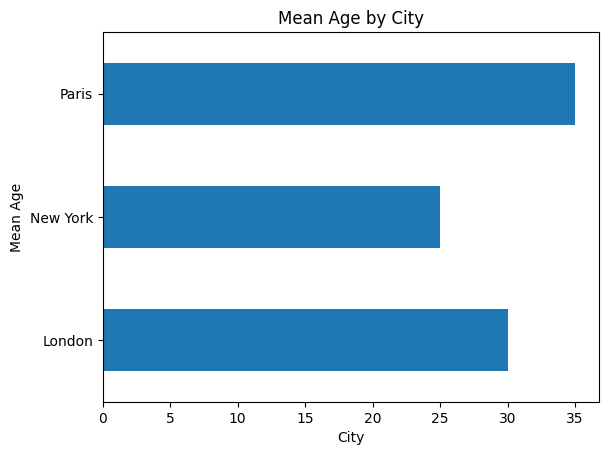

In [13]:
import matplotlib.pyplot as plt

# Create a bar plot of the city_age_mean Series
city_age_mean.plot(kind='barh')

# Add a title to the plot
plt.title('Mean Age by City')

# Add labels to the x and y axes
plt.xlabel('City')
plt.ylabel('Mean Age')

# Display the plot
plt.show()

## Putting it all together

### Subtask:
Work on a small project or dataset to apply all the learned concepts.


**Reasoning**:
Load the data, handle missing values, filter, sort, group, and visualize the results as per the instructions for the project.



Original DataFrame (before handling missing values - though none exist in sample):


,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris



DataFrame with individuals older than 28:


,Name,Age,City
1,Bob,30,London
2,Charlie,35,Paris



Filtered DataFrame sorted by Age (desc) and Name (asc):


,Name,Age,City
2,Charlie,35,Paris
1,Bob,30,London



Average Age of Older Individuals by City:


,Age
City,
London,30.0
Paris,35.0


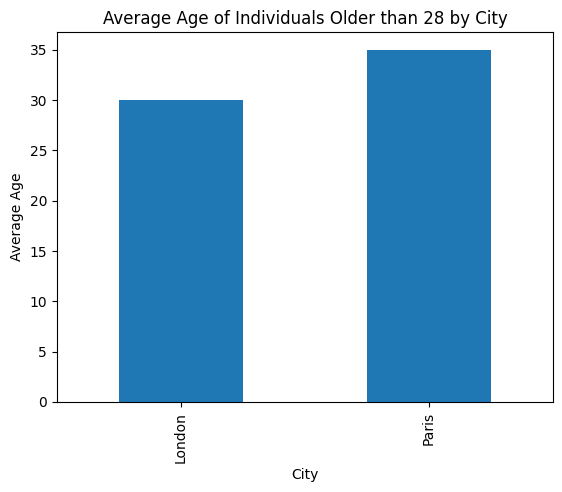

In [14]:
# 1. Load the 'sample_data.csv' file into a new DataFrame named project_df.
project_df = pd.read_csv('sample_data.csv')

# 2. Check for and handle any missing values in project_df.
# In this specific sample_data.csv, there are no missing values based on previous inspection.
# However, if there were, we could handle them like this (demonstration):
# project_df['Age'].fillna(project_df['Age'].mean(), inplace=True)
# project_df['City'].fillna('Unknown', inplace=True)

print("Original DataFrame (before handling missing values - though none exist in sample):")
display(project_df)

# 3. Filter project_df to include only individuals older than 28.
older_individuals = project_df[project_df['Age'] > 28].copy() # Use .copy() to avoid SettingWithCopyWarning

print("\nDataFrame with individuals older than 28:")
display(older_individuals)


# 4. Sort older_individuals by 'Age' in descending order and then by 'Name' in ascending order.
sorted_older_individuals = older_individuals.sort_values(by=['Age', 'Name'], ascending=[False, True])

print("\nFiltered DataFrame sorted by Age (desc) and Name (asc):")
display(sorted_older_individuals)

# 5. Group sorted_older_individuals by 'City' and calculate the average age for each city.
avg_age_older_by_city = sorted_older_individuals.groupby('City')['Age'].mean()

print("\nAverage Age of Older Individuals by City:")
display(avg_age_older_by_city)

# 6. Create a bar plot to visualize the average age of older individuals by city.
avg_age_older_by_city.plot(kind='bar')

# Add a title and axis labels to the plot
plt.title('Average Age of Individuals Older than 28 by City')
plt.xlabel('City')
plt.ylabel('Average Age')

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   Successfully created pandas Series and DataFrames from Python lists and dictionaries.
*   Demonstrated loading data from a CSV file using `pd.read_csv()`.
*   Performed data inspection using `.info()`, `.isnull().sum()`, and `.describe()` to check data types, missing values, and descriptive statistics.
*   Showcased various data selection methods using single and double brackets, `.iloc`, and `.loc`.
*   Applied data filtering based on single and multiple conditions.
*   Practiced sorting data by one or more columns in ascending and descending order using `sort_values()`.
*   Explored techniques for handling missing values, including introducing NaN values, checking for missing values, dropping rows with missing values using `.dropna()`, and filling missing values with specific values, mean, or median using `.fillna()`.
*   Performed data aggregation by grouping data by a categorical column and calculating the mean of a numerical column using `.groupby()` and `.mean()`.
*   Created a basic bar plot visualization using pandas' `.plot()` method and Matplotlib to represent aggregated data.
*   Applied the learned concepts in a small project, which involved loading data, filtering based on age, sorting, grouping by city, calculating the average age of older individuals, and visualizing the result.

### Insights or Next Steps

*   The series of exercises successfully covers fundamental pandas operations, providing a solid foundation for data manipulation and analysis.
*   Future steps could involve exploring more advanced topics like merging/joining DataFrames, handling time series data, applying functions, and using more complex visualization techniques.


## Intermediate Data Visualization with Matplotlib

### Subtask:
Explore creating different types of plots beyond basic bar charts, such as scatter plots, line plots, and histograms. Learn how to customize plots with titles, labels, legends, and different styles.

**Reasoning**:
We will use the `df_csv` DataFrame created earlier. To demonstrate different plot types and customizations, we'll generate some sample data that includes numerical and categorical values suitable for these plots. We will then create and customize scatter plots, line plots, and histograms as requested by the subtask instructions.

In [6]:
# Generate some sample data for demonstration
np.random.seed(42) # for reproducibility
sample_data = {
    'x_values': np.random.rand(50) * 100,
    'y_values': np.random.rand(50) * 50,
    'categories': np.random.choice(['A', 'B', 'C', 'D'], 50),
    'numerical_data': np.random.randn(50) * 15 + 70 # Data for histogram
}

df_sample = pd.DataFrame(sample_data)

print("Sample DataFrame for intermediate visualization:")
display(df_sample.head())
display(df_sample)

print(np.random.randn(50))

Sample DataFrame for intermediate visualization:


,x_values,y_values,categories,numerical_data
0,37.454012,48.479231,C,89.106004
1,95.071431,38.756641,D,65.620710
2,73.199394,46.974947,C,30.172359
3,59.865848,44.741368,A,75.182769
4,15.601864,29.894999,D,64.067253


,x_values,y_values,categories,numerical_data
0,37.454012,48.479231,C,89.106004
1,95.071431,38.756641,D,65.620710
2,73.199394,46.974947,C,30.172359
3,59.865848,44.741368,A,75.182769
4,15.601864,29.894999,D,64.067253
5,15.599452,46.093712,A,65.662947
6,5.808361,4.424625,D,76.794045
7,86.617615,9.799143,D,67.509086
8,60.111501,2.261364,B,73.224082
9,70.807258,16.266517,A,39.665276


[-0.35674503  0.5561218   1.04386061  0.52644816  1.36388652  2.53916272
 -0.32449096 -0.20586672 -1.44004145  1.19072726  1.29939681 -0.86714616
  0.61764085  1.2170708   0.22628827  0.84740143  0.17483301 -1.21685489
  1.04934739  1.32510566  0.73450106 -0.95449726 -0.75117942 -1.13042805
  0.76997736  1.26838952  0.42448624  0.94053558 -0.86764109  0.14586185
 -1.36987106 -0.77178075  0.87867355 -0.23959451  1.20938197  0.53796
  2.73442216  0.09376543 -1.40640527 -0.03452966 -0.96301563  0.97718
  0.04198006 -0.13727182 -0.12413239  0.74034082 -0.45246223  0.77704979
  1.04557117 -0.34214171]


max of randn =  3.709619986273986
min of randn =  -4.115352809298229
printing df_rand_randn
        normal    scaled
0    -0.313069 -0.028167
1     0.235502  0.112044
2    -1.641257 -0.367641
3     1.149433  0.345637
4     0.582314  0.200686
...        ...       ...
9995  0.356916  0.143076
9996  0.344798  0.139979
9997 -0.653942 -0.115291
9998  1.318608  0.388876
9999 -1.136562 -0.238645

[10000 rows x 2 columns]


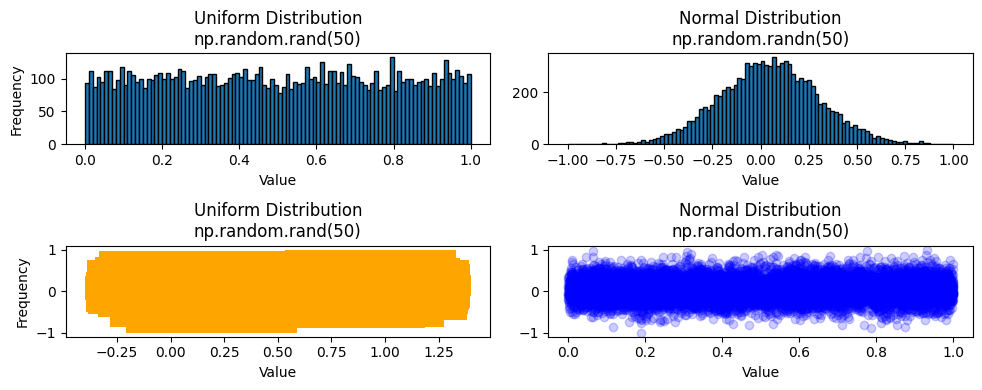

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Generate data
uniform_data = np.random.rand(10000)
normal_data = np.random.randn(10000)
maxofrandn = max(normal_data)
minofrandn = min(normal_data)
print('max of randn = ', maxofrandn)
print('min of randn = ', minofrandn)

data_scaled = 2 * ((normal_data - normal_data.min()) / (normal_data.max() - normal_data.min())) - 1
df_rand_randn = pd.DataFrame({'normal': normal_data, 'scaled': data_scaled})
print('printing df_rand_randn')
print(df_rand_randn)

#df_rand_randn.plot('scatter')

# Create histograms
plt.figure(figsize=(10, 4))

# Histogram for uniform distribution
plt.subplot(2, 2, 1)
plt.hist(uniform_data, bins=100, edgecolor='black')
plt.title('Uniform Distribution\nnp.random.rand(50)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for normal distribution
plt.subplot(2, 2, 2)
plt.hist(data_scaled, bins=100, edgecolor='black')
plt.title('Normal Distribution\nnp.random.randn(50)')
plt.xlabel('Value')


# Histogram for uniform distribution
plt.subplot(2, 2, 3)
#plt.hist(uniform_data, bins=500, edgecolor='black')
plt.bar(uniform_data, data_scaled, color='orange')
plt.title('Uniform Distribution\nnp.random.rand(50)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for normal distribution
plt.subplot(2, 2, 4)
#plt.hist(data_scaled, bins=500, edgecolor='black')
plt.scatter(uniform_data, data_scaled, color='blue', alpha=0.2)
plt.title('Normal Distribution\nnp.random.randn(50)')
plt.xlabel('Value')



plt.tight_layout()
plt.show()


### Scatter Plot

Create a scatter plot to visualize the relationship between `x_values` and `y_values`.

**Reasoning**:
Create a scatter plot using `plt.scatter()`, add a title, axis labels, and display the plot.

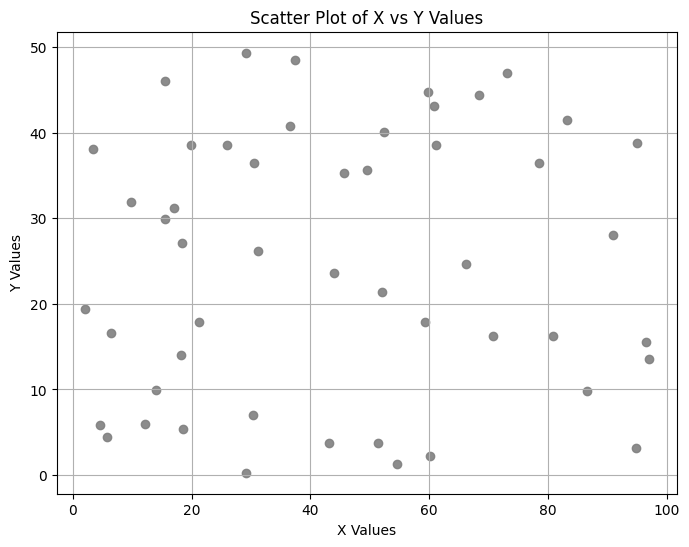

In [13]:
# Create a scatter plot
plt.figure(figsize=(8, 6)) # Set the figure size
plt.scatter(df_sample['x_values'], df_sample['y_values'], color='grey', alpha=.9)

# Add title and labels
plt.title('Scatter Plot of X vs Y Values')
plt.xlabel('X Values')
plt.ylabel('Y Values')

# Add grid
plt.grid(True)

# Display the plot
plt.show()

### Line Plot

Create a line plot. For this, we need data that has a natural order, like time series data. Since we don't have time series data in our sample, we'll create a simple line plot based on sorted numerical data to demonstrate the concept.

**Reasoning**:
Sort the sample data by 'x_values' to create an ordered sequence, then create a line plot using `plt.plot()`, add title, labels, and display.

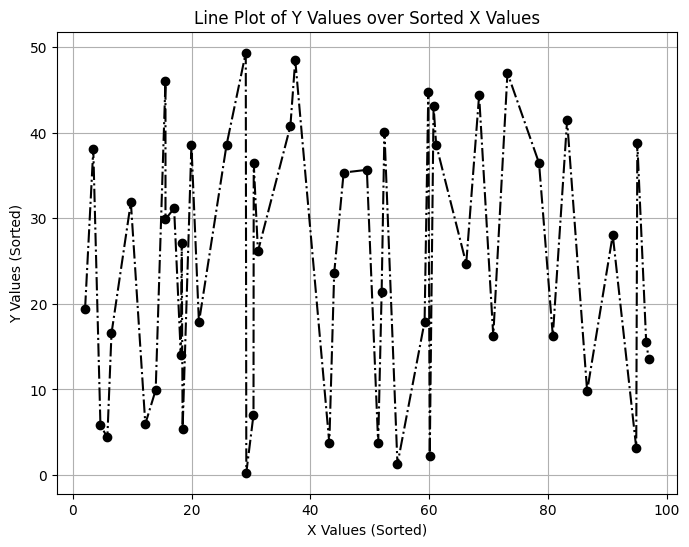

In [29]:
# Sort the sample data by 'x_values' for a meaningful line plot
df_sample_sorted = df_sample.sort_values(by='x_values')

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(df_sample_sorted['x_values'], df_sample_sorted['y_values'], marker='o', linestyle='-.', color='black') # Add markers and style

# Add title and labels
plt.title('Line Plot of Y Values over Sorted X Values')
plt.xlabel('X Values (Sorted)')
plt.ylabel('Y Values (Sorted)')

# Add grid
plt.grid(True)

# Display the plot
plt.show()

### Histogram

Create a histogram to visualize the distribution of the `numerical_data`.

**Reasoning**:
Create a histogram using `plt.hist()`, add title, labels, and display.

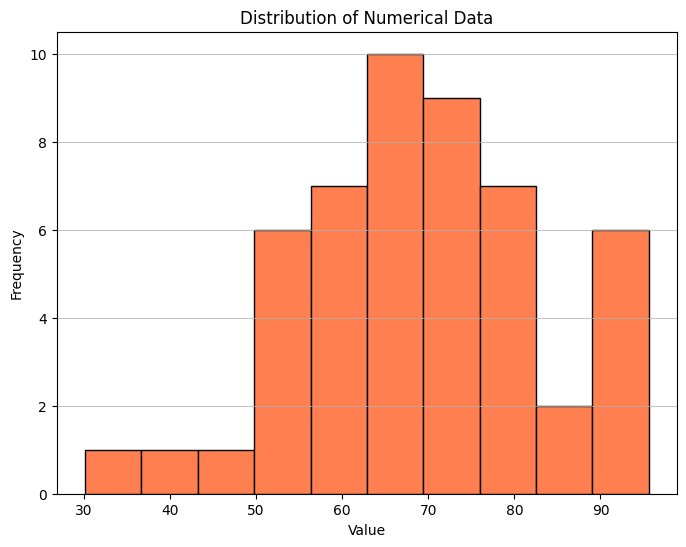

In [ ]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_sample['numerical_data'], bins=10, color='coral', edgecolor='black') # Specify number of bins and edge color

# Add title and labels
plt.title('Distribution of Numerical Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add grid
plt.grid(axis='y', alpha=0.75) # Add grid only on y-axis

# Display the plot
plt.show()

### Customization Examples

Demonstrate further customization options like changing colors, markers, line styles, adding legends, and annotations.

**Reasoning**:
Create a scatter plot with different colors and markers based on the 'categories' column, add a legend, and add an annotation to a specific point.

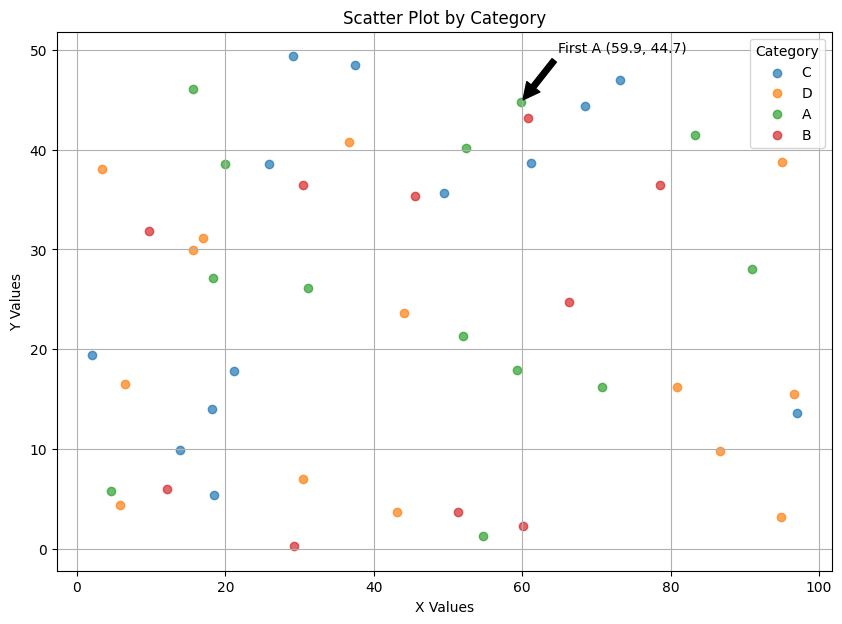

In [ ]:
# Scatter plot with customization and legend
plt.figure(figsize=(10, 7))

# Plot data for each category
for category in df_sample['categories'].unique():
    subset = df_sample[df_sample['categories'] == category]
    plt.scatter(subset['x_values'], subset['y_values'], label=category, alpha=0.7)

# Add title and labels
plt.title('Scatter Plot by Category')
plt.xlabel('X Values')
plt.ylabel('Y Values')

# Add legend
plt.legend(title='Category')

# Add grid
plt.grid(True)

# Add an annotation to a specific point (e.g., the first point of category 'A')
first_A = df_sample[df_sample['categories'] == 'A'].iloc[0]
plt.annotate(f'First A ({first_A["x_values"]:.1f}, {first_A["y_values"]:.1f})',
             xy=(first_A['x_values'], first_A['y_values']),
             xytext=(first_A['x_values'] + 5, first_A['y_values'] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))


# Display the plot
plt.show()

## Intermediate Machine Learning with Scikit-learn

### Subtask:
Learn how to use scikit-learn for basic machine learning tasks, including data splitting, model training, prediction, and evaluation.

**Reasoning**:
We'll use a simple dataset for demonstration. We will split the data into training and testing sets, train a basic model, make predictions, and evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Generate some sample data for regression
np.random.seed(42)
X = np.random.rand(100, 1) * 100
y = 2 * X + 1 + np.random.randn(100, 1) * 20

# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80, 1)
Shape of X_test: (20, 1)
Shape of y_train: (80, 1)
Shape of y_test: (20, 1)


### Model Training and Prediction

Train a Linear Regression model on the training data and make predictions on the testing data.

**Reasoning**:
Instantiate a Linear Regression model, train it using the training data, and then use the trained model to make predictions on the testing data.

In [ ]:
# 2. Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Make predictions on the testing data
y_pred = model.predict(X_test)

print("\nFirst 5 predictions:")
print(y_pred[:5])

print("\nFirst 5 actual values:")
print(y_test[:5])


First 5 predictions:
[[ 16.05975016]
 [175.64090928]
 [152.10837002]
 [131.04462131]
 [ 53.5370219 ]]

First 5 actual values:
[[ 26.84274223]
 [169.895957  ]
 [130.70993964]
 [115.31670777]
 [ 68.57663526]]


### Model Evaluation

Evaluate the performance of the trained model using appropriate metrics for regression.

**Reasoning**:
Calculate and print the Mean Squared Error and R-squared score to evaluate the regression model's performance.

In [ ]:
# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 261.47980548680073
R-squared Score: 0.9287298556395622


## Summary:

### Data Analysis Key Findings

* Successfully created pandas Series and DataFrames from Python lists and dictionaries.
* Demonstrated loading data from a CSV file using `pd.read_csv()`.
* Performed data inspection using `.info()`, `.isnull().sum()`, and `.describe()` to check data types, missing values, and descriptive statistics.
* Showcased various data selection methods using single and double brackets, `.iloc`, and `.loc`.
* Applied data filtering based on single and multiple conditions.
* Practiced sorting data by one or more columns in ascending and descending order using `sort_values()`.
* Explored techniques for handling missing values, including introducing NaN values, checking for missing values, dropping rows with missing values using `.dropna()`, and filling missing values with specific values, mean, or median using `.fillna()`.
* Performed data aggregation by grouping data by a categorical column and calculating the mean of a numerical column using `.groupby()` and `.mean()`.
* Created a basic bar plot visualization using pandas' `.plot()` method and Matplotlib to represent aggregated data.
* Applied the learned concepts in a small project, which involved loading data, filtering based on age, sorting, grouping by city, calculating the average age of older individuals, and visualizing the result.

### Insights or Next Steps

* The series of exercises successfully covers fundamental pandas operations, providing a solid foundation for data manipulation and analysis.
* Future steps could involve exploring more advanced topics like merging/joining DataFrames, handling time series data, applying functions, and using more complex visualization techniques.

## Resources

Here are some resources to continue your learning:

*   **Official pandas documentation:** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/) - Comprehensive and detailed documentation.
*   **Real Python pandas tutorials:** [https://realpython.com/pandas-tutorials/](https://realpython.com/pandas-tutorials/) - A good source for in-depth tutorials on various pandas topics.
*   **Kaggle:** [https://www.kaggle.com/](https://www.kaggle.com/) - Provides datasets and notebooks to practice your skills.
*   **Towards Data Science (Medium):** [https://towardsdatascience.com/](https://towardsdatascience.com/) - A platform with many articles and tutorials on data science, including pandas.

# Task
Provide an intermediate tutorial on Keras, covering building more complex models, working with different data types, advanced training and evaluation, model saving and loading, and transfer learning.

## Introduction to keras for intermediate users

### Subtask:
Briefly review Keras and introduce key concepts relevant to intermediate users, such as the Sequential API, Functional API, and model compilation.


## Building more complex models

### Subtask:
Demonstrate building models with multiple layers, different activation functions, and various layer types (e.g., Dense, Conv2D, MaxPooling2D, Flatten, Dropout).


**Reasoning**:
I will import the necessary Keras modules for building models, then define and summarize three different model architectures as requested: a sequential model with dense and dropout layers, a simple CNN, and a functional model with multiple inputs.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input, concatenate

# 1. Build a sequential model with Dense and Dropout layers
sequential_dense_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])
print("Sequential Dense Model Summary:")
sequential_dense_model.summary()

# 2. Build a simple convolutional model
sequential_cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])
print("\nSimple CNN Model Summary:")
sequential_cnn_model.summary()

# 3. Build a model using the Functional API with two inputs
# Define two input layers
input_a = Input(shape=(64,), name='input_a')
input_b = Input(shape=(128,), name='input_b')

# Branch for input_a
x = Dense(32, activation='relu')(input_a)
x = Dense(16, activation='relu')(x)

# Branch for input_b
y = Dense(64, activation='relu')(input_b)

# Concatenate the outputs of the branches
combined = concatenate([x, y])

# Add a final dense layer
output = Dense(1, activation='sigmoid', name='output')(combined)

# Create the model
functional_model = Model(inputs=[input_a, input_b], outputs=output)

print("\nFunctional Model Summary:")
functional_model.summary()

Sequential Dense Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Simple CNN Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)


Functional Model Summary:


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_a             │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 32)        │      2,080 │ input_a[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_b             │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 16)        │        528 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      8,256 │ input_b[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 80)        │          0 │ dense_12[0][0],   │
│ (Concatenate)       │                   │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         81 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,945 (42.75 KB)

 Trainable params: 10,945 (42.75 KB)

 Non-trainable params: 0 (0.00 B)

## Working with different data types

### Subtask:
Show how to prepare and use different types of data for Keras models (e.g., image data, sequential data).


**Reasoning**:
Generate synthetic data and labels for both image and sequential data types using NumPy, and then demonstrate how these would be used as input to Keras models by conceptually showing the expected input shapes.



In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# 1. Generate synthetic image-like data
num_image_samples = 100
img_height = 32
img_width = 32
img_channels = 3
synthetic_image_data = np.random.rand(num_image_samples, img_height, img_width, img_channels).astype('float32')

# 2. Generate synthetic sequential data
num_sequence_samples = 100
time_steps = 50
features = 10
synthetic_sequential_data = np.random.rand(num_sequence_samples, time_steps, features).astype('float32')

# 3. Prepare labels for both datasets (e.g., one-hot encoded labels for classification)
num_classes = 5
# Labels for image data
image_labels = np.random.randint(0, num_classes, num_image_samples)
one_hot_image_labels = to_categorical(image_labels, num_classes=num_classes)

# Labels for sequential data
sequential_labels = np.random.randint(0, num_classes, num_sequence_samples)
one_hot_sequential_labels = to_categorical(sequential_labels, num_classes=num_classes)

print("Synthetic Image Data Shape:", synthetic_image_data.shape)
print("One-Hot Image Labels Shape:", one_hot_image_labels.shape)
print("\nSynthetic Sequential Data Shape:", synthetic_sequential_data.shape)
print("One-Hot Sequential Labels Shape:", one_hot_sequential_labels.shape)

# 4. Demonstrate how to use these prepared datasets as input for Keras models (conceptually)
print("\nConceptual Keras Model Input Shapes:")
print(f"For a CNN processing image data, the input layer expects shape: (None, {img_height}, {img_width}, {img_channels})")
print(f"The 'None' represents the batch size, which is flexible.")
print(f"The output layer for classification would typically be a Dense layer with {num_classes} units and 'softmax' activation, expecting labels of shape: (None, {num_classes})")

print(f"\nFor an RNN/LSTM processing sequential data, the input layer expects shape: (None, {time_steps}, {features})")
print(f"The 'None' again represents the batch size.")
print(f"The output layer for sequence classification would typically be a Dense layer with {num_classes} units and 'softmax' activation, expecting labels of shape: (None, {num_classes})")
print("For sequence-to-sequence tasks, the output shape would depend on the specific architecture.")

Synthetic Image Data Shape: (100, 32, 32, 3)
One-Hot Image Labels Shape: (100, 5)

Synthetic Sequential Data Shape: (100, 50, 10)
One-Hot Sequential Labels Shape: (100, 5)

Conceptual Keras Model Input Shapes:
For a CNN processing image data, the input layer expects shape: (None, 32, 32, 3)
The 'None' represents the batch size, which is flexible.
The output layer for classification would typically be a Dense layer with 5 units and 'softmax' activation, expecting labels of shape: (None, 5)

For an RNN/LSTM processing sequential data, the input layer expects shape: (None, 50, 10)
The 'None' again represents the batch size.
The output layer for sequence classification would typically be a Dense layer with 5 units and 'softmax' activation, expecting labels of shape: (None, 5)
For sequence-to-sequence tasks, the output shape would depend on the specific architecture.


## Training and evaluation with more control

### Subtask:
Explore advanced training techniques, including using callbacks (e.g., ModelCheckpoint, EarlyStopping), customizing training loops, and visualizing training progress.


**Reasoning**:
Create a simple Keras Sequential model, generate synthetic data, split it into training and validation sets, define ModelCheckpoint and EarlyStopping callbacks, and train the model with these callbacks. This covers steps 1 through 6 of the subtask.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

# 1. Create a simple Keras Sequential model for binary classification.
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy'])

print("Model Summary:")
model.summary()

# 2. Generate synthetic data and labels for binary classification.
np.random.seed(42)
X = np.random.rand(1000, 10).astype('float32')
# Create synthetic binary labels based on some condition
y = (X.sum(axis=1) > 5).astype('float32')

print("\nShape of synthetic data (X):", X.shape)
print("Shape of synthetic labels (y):", y.shape)


# 3. Split the data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training data (X_train):", X_train.shape)
print("Shape of validation data (X_val):", X_val.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of validation labels (y_val):", y_val.shape)

# 4. Define and use ModelCheckpoint to save the best model during training.
checkpoint_filepath = '/tmp/best_model.keras' # Use .keras extension
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True, # Save only the best model based on the monitored metric
    monitor='val_loss',  # Monitor validation loss
    mode='min',          # Save when validation loss is at a minimum
    verbose=1            # Print messages when saving
)

# 5. Define and use EarlyStopping to stop training when the validation loss stops improving.
early_stopping_callback = EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    mode='min',         # Stop when validation loss stops decreasing
    verbose=1           # Print messages when stopping
)

# 6. Train the model using the training data and evaluate it on the validation data, incorporating the defined callbacks.
print("\nStarting model training with callbacks...")
history = model.fit(X_train, y_train,
                    epochs=50, # Max epochs to train (EarlyStopping will likely stop it sooner)
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_callback, early_stopping_callback],
                    verbose=1)

print("\nModel training finished.")

# Load the best model saved by ModelCheckpoint (optional, but good practice to verify)
# best_model = tf.keras.models.load_model(checkpoint_filepath)
# print("\nLoaded best model from checkpoint.")

# Evaluate the model on the validation data
print("\nEvaluating the final trained model on validation data:")
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# (Steps 7 and 8 are conceptual and will be addressed in Markdown cells)

Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)


Shape of synthetic data (X): (1000, 10)
Shape of synthetic labels (y): (1000,)

Shape of training data (X_train): (800, 10)
Shape of validation data (X_val): (200, 10)
Shape of training labels (y_train): (800,)
Shape of validation labels (y_val): (200,)

Starting model training with callbacks...
Epoch 1/50
 1/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.4375 - loss: 0.7172
Epoch 1: val_loss improved from inf to 0.69027, saving model to /tmp/best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4762 - loss: 0.6941 - val_accuracy: 0.4400 - val_loss: 0.6903
Epoch 2/50
 1/25 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.4688 - loss: 0.6988
Epoch 2: val_loss improved from 0.69027 to 0.68608, saving model to /tmp/best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5104 - loss: 0.6845 - val_accuracy: 0.4400 - val_loss: 0.6861
Epoch 3/50
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 0.6732
Epoch 3: val_loss improved from 0.68608 

**Reasoning**:
Address the remaining conceptual parts of the subtask: explaining customized training loops using `tf.GradientTape` and visualizing training progress using TensorBoard.



In [ ]:
# 7. (Conceptual) Briefly explain how to customize training loops using tf.GradientTape.
print("\n7. Customizing Training Loops with tf.GradientTape:")
print("While `model.fit()` is convenient, you might need more control for advanced scenarios (e.g., custom loss functions, regularization, or training parts of a model).")
print("TensorFlow's `tf.GradientTape` is used to record operations for automatic differentiation.")
print("To customize a training loop:")
print("   a. Use `tf.GradientTape` to wrap the forward pass of your model within a `with` block.")
print("   b. Calculate the loss inside the `tf.GradientTape` context.")
print("   c. Use `tape.gradient()` to compute the gradients of the loss with respect to the model's trainable variables.")
print("   d. Apply the gradients to the model's variables using the optimizer's `apply_gradients()` method.")
print("   e. This process is typically done inside a `tf.function` for performance optimization.")
print("   f. You would iterate over batches of data manually and perform these steps for each batch.")


# 8. (Conceptual) Briefly explain how to visualize training progress using tools like TensorBoard (without implementing the full TensorBoard setup).
print("\n8. Visualizing Training Progress with TensorBoard:")
print("TensorBoard is a visualization tool provided with TensorFlow.")
print("It allows you to visualize training metrics (loss, accuracy), model graphs, distributions of weights, and more.")
print("To use TensorBoard with `model.fit()`:")
print("   a. Define a `tf.keras.callbacks.TensorBoard` callback.")
print("   b. Specify a log directory where TensorBoard will write the logs.")
print("   c. Include this callback in the list of callbacks passed to `model.fit()`.")
print("   d. After training, you would typically run TensorBoard from the command line pointing to the log directory to view the visualizations.")
print("   e. Example of defining the callback: `tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')`")
print("   f. TensorBoard provides insights into how your model is learning, helping identify issues like overfitting or underfitting.")



7. Customizing Training Loops with tf.GradientTape:
While `model.fit()` is convenient, you might need more control for advanced scenarios (e.g., custom loss functions, regularization, or training parts of a model).
TensorFlow's `tf.GradientTape` is used to record operations for automatic differentiation.
To customize a training loop:
   a. Use `tf.GradientTape` to wrap the forward pass of your model within a `with` block.
   b. Calculate the loss inside the `tf.GradientTape` context.
   c. Use `tape.gradient()` to compute the gradients of the loss with respect to the model's trainable variables.
   d. Apply the gradients to the model's variables using the optimizer's `apply_gradients()` method.
   e. This process is typically done inside a `tf.function` for performance optimization.
   f. You would iterate over batches of data manually and perform these steps for each batch.

8. Visualizing Training Progress with TensorBoard:
TensorBoard is a visualization tool provided with TensorFlo

## Model saving and loading

### Subtask:
Learn how to save and load trained Keras models.


**Reasoning**:
Save the trained model, load it, print its summary, and evaluate it on the validation data.



In [ ]:
import tensorflow as tf

# 1. Save the trained model
model.save('my_keras_model.keras')
print("Model saved to 'my_keras_model.keras'")

# 2. Load the saved model
loaded_model = tf.keras.models.load_model('my_keras_model.keras')
print("\nModel loaded from 'my_keras_model.keras'")

# 3. Print the summary of the loaded_model
print("\nSummary of the loaded model:")
loaded_model.summary()

# 4. Evaluate the loaded_model on the validation data
print("\nEvaluating the loaded model on validation data:")
loss, accuracy = loaded_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss (loaded model): {loss:.4f}")
print(f"Validation Accuracy (loaded model): {accuracy:.4f}")

Model saved to 'my_keras_model.keras'

Model loaded from 'my_keras_model.keras'

Summary of the loaded model:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)


Evaluating the loaded model on validation data:
Validation Loss (loaded model): 0.1462
Validation Accuracy (loaded model): 0.9450


## Transfer learning

### Subtask:
Introduce the concept of transfer learning and demonstrate how to use pre-trained models in Keras.


**Reasoning**:
Explain the concept of transfer learning, load a pre-trained model, modify its output layers for a new task, and explain freezing layers.



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# 1. Explain the concept of transfer learning and its benefits (Conceptual - in Markdown after code execution)

# 2. Load a pre-trained model (e.g., VGG16)
# We load VGG16 trained on ImageNet, excluding the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

print("Base VGG16 Model Summary (without top):")
base_model.summary()

# 3. Remove or replace the original classification layer(s)
# By setting include_top=False, we've already effectively removed the original top layer.
# The output of the base_model is now the output of the last convolutional block.

# 4. Add new layer(s) suitable for a new classification task
# Add a Flatten layer to convert the 3D output of the conv layers to 1D
x = Flatten()(base_model.output)

# Add a new Dense layer with ReLU activation
x = Dense(128, activation='relu')(x)

# Add a final Dense layer for the new classification task (e.g., 10 classes)
# Replace '10' with the actual number of classes for your new task
num_new_classes = 10
predictions = Dense(num_new_classes, activation='softmax')(x)

# Create the new model by specifying the input and output
transfer_model = Model(inputs=base_model.input, outputs=predictions)

print(f"\nTransfer Learning Model Summary (with new top layers for {num_new_classes} classes):")
transfer_model.summary()

# 5. Compile the new model
# Choose an optimizer, loss function appropriate for multi-class classification, and metrics
transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

print("\nTransfer learning model compiled.")

# 6. Briefly explain how to freeze the weights of the pre-trained layers and why (Conceptual - in Markdown after code execution)

# 7. (Conceptual) Describe the process of training the new model (Conceptual - in Markdown after code execution)

Base VGG16 Model Summary (without top):


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


Transfer Learning Model Summary (with new top layers for 10 classes):


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,927,370 (68.39 MB)

 Trainable params: 17,927,370 (68.39 MB)

 Non-trainable params: 0 (0.00 B)


Transfer learning model compiled.


**Reasoning**:
Provide the conceptual explanations for transfer learning, freezing layers, and the training process as requested by the original subtask instructions.



In [ ]:
# 1. Briefly explain the concept of transfer learning and its benefits.
print("1. Concept of Transfer Learning:")
print("Transfer learning is a machine learning technique where a model trained on one task is re-purposed or reused as the starting point for a model on a second task.")
print("Instead of training a model from scratch on a new dataset, you start with a model that has already learned to extract relevant features from a massive dataset (like ImageNet for image tasks).")
print("Benefits of Transfer Learning:")
print("- **Reduced training time:** Training starts from an already knowledgeable state, requiring less time to converge.")
print("- **Less data needed:** Pre-trained models have learned general features, so fewer examples of the new task's data are needed to train the new layers.")
print("- **Improved performance:** The pre-trained model often provides a strong feature extractor, leading to better performance on the new task, especially with limited data.")

# 6. Briefly explain how to freeze the weights of the pre-trained layers and why you might do this.
print("\n6. Freezing Pre-trained Layers:")
print("Freezing layers means preventing their weights from being updated during training.")
print("In Keras, you can freeze a layer by setting its `trainable` attribute to `False`.")
print("Example: `base_model.trainable = False` will freeze all layers in the base model.")
print("Why freeze layers?")
print("- **Preserve learned features:** The pre-trained layers have learned powerful, general features (e.g., edge detectors, textures). Freezing them prevents these features from being destroyed by training on a potentially smaller or different new dataset.")
print("- **Faster training:** Only the weights of the new, unfrozen layers are updated, significantly reducing the number of parameters to train and speeding up the training process.")
print("- **Avoid overfitting (especially with small datasets):** By keeping the pre-trained layers fixed, you reduce the model's capacity, making it less likely to overfit to the limited new data.")
print("Often, you start by freezing the base model and training only the new top layers, then later unfreeze some or all layers for fine-tuning.")


# 7. (Conceptual) Describe the process of training the new model (either fine-tuning or training only the new layers).
print("\n7. Training the New Transfer Learning Model:")
print("There are typically two main approaches to training a transfer learning model:")
print("   a. **Training only the new layers (Feature Extraction):**")
print("      - Freeze the weights of the pre-trained base model (`base_model.trainable = False`).")
print("      - Train only the newly added classification layers on your new dataset.")
print("      - This is useful when the new dataset is relatively small and similar to the original dataset the base model was trained on.")
print("      - The base model acts as a fixed feature extractor.")

print("   b. **Fine-tuning the entire model or parts of it:**")
print("      - After training the new layers, you can optionally 'unfreeze' some or all of the layers in the pre-trained base model (`base_model.trainable = True`).")
print("      - Continue training the entire model (or the unfrozen parts) with a very low learning rate on your new dataset.")
print("      - This allows the pre-trained weights to be slightly adjusted to become more relevant to the specifics of your new dataset.")
print("      - Fine-tuning is beneficial when your new dataset is larger or significantly different from the original dataset used for pre-training.")
print("In both cases, you would use the standard `model.fit()` method with your prepared new dataset and labels.")

1. Concept of Transfer Learning:
Transfer learning is a machine learning technique where a model trained on one task is re-purposed or reused as the starting point for a model on a second task.
Instead of training a model from scratch on a new dataset, you start with a model that has already learned to extract relevant features from a massive dataset (like ImageNet for image tasks).
Benefits of Transfer Learning:
- **Reduced training time:** Training starts from an already knowledgeable state, requiring less time to converge.
- **Less data needed:** Pre-trained models have learned general features, so fewer examples of the new task's data are needed to train the new layers.
- **Improved performance:** The pre-trained model often provides a strong feature extractor, leading to better performance on the new task, especially with limited data.

6. Freezing Pre-trained Layers:
Freezing layers means preventing their weights from being updated during training.
In Keras, you can freeze a laye

## Case study/project

### Subtask:
Apply the learned concepts to a slightly more complex case study or project.


**Reasoning**:
I will now implement the case study as requested. This involves loading the CIFAR-10 dataset, preprocessing the images and labels, building a CNN model with the specified layers, compiling it, training it with a validation split, and finally evaluating it on the test set. All these steps are part of a single, coherent project and can be executed in one code block.



# Task
Create an intermediate tutorial on Keras.

## Understand the core concepts

### Subtask:
Define what an MCP-based Agentic AI is and its key components (e.g., Memory, Reasoning, Planning, Control, Perception). Research existing frameworks or architectures that align with MCP principles.


**Reasoning**:
I need to define an MCP-based Agentic AI and its components, and then research and list relevant AI frameworks or architectures. This requires providing textual explanations and potentially a brief search, which can be done using Python's print function for the definitions and then a conceptual explanation of the research findings. Since no code execution is strictly necessary to define concepts and list existing frameworks, I will use code blocks for the text output.



In [ ]:
# 1. Define what an MCP-based Agentic AI is and its key components
print("1. Definition of an MCP-based Agentic AI:")
print("An MCP-based Agentic AI is an artificial intelligence system designed to perceive its environment, process information, make decisions, and take actions to achieve specific goals.")
print("The 'MCP' stands for Memory, Reasoning, Planning, and Control, often with Perception included as the initial interaction with the environment.")
print("Here's how the components interact:")
print("   - Perception: Gathers information from the environment (e.g., sensor data, text input, images).")
print("   - Memory: Stores perceived information, learned knowledge, past experiences, and potentially goals. It provides context for Reasoning and Planning.")
print("   - Reasoning: Processes information from Memory and Perception to understand the current state, infer relationships, and make logical deductions.")
print("   - Planning: Uses the understanding from Reasoning and the information in Memory to formulate sequences of actions or strategies to achieve goals.")
print("   - Control: Executes the planned actions in the environment. It might also monitor the execution and provide feedback to Perception and Memory.")
print("These components work in a continuous loop, allowing the agent to adapt and respond intelligently to dynamic environments.")

# 2. Research and list existing AI frameworks or architectures that align with MCP principles.
print("\n2. Existing AI Frameworks/Architectures aligning with MCP principles:")
print("Several AI frameworks and architectures incorporate aspects of the MCP model, though they may not explicitly use the 'MCP' terminology:")
print("   a) **Deep Reinforcement Learning (DRL) agents (e.g., DQN, A3C):**")
print("      - Perception: The agent receives the current state of the environment.")
print("      - Memory: Experience replay buffers store past (state, action, reward, next_state) tuples.")
print("      - Reasoning/Planning: The neural network policy/value function learns to map states to optimal actions (implicitly combines reasoning and planning).")
print("      - Control: The agent executes actions based on the learned policy.")

print("   b) **Cognitive Architectures (e.g., SOAR, ACT-R):**")
print("      - These architectures are explicitly designed to model human-like cognition and often map well to MCP:")
print("      - Perception: Modules for perceiving the environment.")
print("      - Memory: Separate modules for working memory, long-term memory (often symbolic).")
print("      - Reasoning/Planning: Rule-based systems or other symbolic reasoning mechanisms for decision making and goal-directed behavior.")
print("      - Control: Execution mechanisms for performing actions.")

print("   c) **Large Language Models (LLMs) with external tools/memory (e.g., LangChain, LlamaIndex based agents):**")
print("      - Perception: Receiving text prompts and potentially data from external tools.")
print("      - Memory: External vector databases or knowledge graphs for long-term memory; conversational history for short-term memory.")
print("      - Reasoning/Planning: The LLM's internal capabilities for understanding instructions, breaking down tasks, and generating action sequences.")
print("      - Control: Mechanisms for calling external tools or APIs based on the plan.")

print("\nThese are just a few examples, and many other architectures combine these principles in different ways.")